# Heart Attack Data Exploration

In [2]:
#!pip install imbalanced-learn

In [37]:
#!pip install xgboost

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve
#from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline



## Loading and Preprocessing Heart Attack Data

In [2]:
# Loading data
file_path = Path("../Resources/heart_attack_prediction_dataset.csv")
df_heart = pd.read_csv(file_path)
df_heart.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Unnamed: 26,latitude,longitude
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,286,0,6,Argentina,South America,Southern Hemisphere,0,NaN,NaN,NaN
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,235,1,7,Canada,North America,Northern Hemisphere,0,NaN,NaN,NaN
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,587,4,4,France,Europe,Northern Hemisphere,0,NaN,NaN,NaN
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,378,3,4,Canada,North America,Northern Hemisphere,0,NaN,NaN,NaN
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,231,1,5,Thailand,Asia,Northern Hemisphere,0,NaN,NaN,NaN


In [3]:
# Define target vector
y = df_heart["Heart Attack Risk"]
y[:10]

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Heart Attack Risk, dtype: int64

In [4]:
# Define features set
X = df_heart.copy()
# Drop interfering and target columns
X.drop(["Patient ID","Country","Continent","Hemisphere", "Blood Pressure",
        "Smoking", "Diabetes", "Obesity", "Alcohol Consumption", "Previous Heart Problems", "Medication Use",
        "Family History", "Diet", "Sleep Hours Per Day", "Physical Activity Days Per Week", "Heart Attack Risk",
        "Stress Level", "Sex", "Unnamed: 26", "latitude", "longitude"], axis=1, inplace=True)
X.head()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,BMI,Triglycerides
0,67,208,72,4.168189,6.615001,261404,31.251233,286
1,21,389,98,1.813242,4.963459,285768,27.194973,235
2,21,324,72,2.078353,9.463426,235282,28.176571,587
3,84,383,73,9.828130,7.648981,125640,36.464704,378
4,66,318,93,5.804299,1.514821,160555,21.809144,231


In [5]:
# Make sure that no data needs scaling
X.dtypes

Age                          int64
Cholesterol                  int64
Heart Rate                   int64
Exercise Hours Per Week    float64
Sedentary Hours Per Day    float64
Income                       int64
BMI                        float64
Triglycerides                int64
dtype: object

In [6]:
# Convert float numbers to int to reduce number of unique values
X['Exercise Hours Per Week'] = X['Exercise Hours Per Week'].astype(int)
X['Sedentary Hours Per Day'] = X['Sedentary Hours Per Day'].astype(int)
X['BMI'] = X['BMI'].astype(int)
X.nunique()

Age                          73
Cholesterol                 281
Heart Rate                   71
Exercise Hours Per Week      20
Sedentary Hours Per Day      12
Income                     8615
BMI                          22
Triglycerides               771
dtype: int64

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE (REJECTED)
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Applying NearMiss (REJECTED)
#nm1 = NearMiss(version=1)
#X_resampled, y_resampled = nm1.fit_resample(X_train, y_train)

# Applying RandomUnderSampler (REJECTED)
#rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
#X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

## Fitting the Random Forest Model

In [8]:
## Build model with hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop =200, num =10)]
# Number of features to consider in every split
max_features = ['auto', 'log2', 'sqrt']
# Max number of levels in tree
max_depth = [2,5]
# Min number of samples required to split a node
min_samples_split = [2,5]
# Min number of samples required in each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4, scoring='recall')
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'max_depth': [2, 5],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 111, 122, 133, 144, 155, 166,
                                          177, 188, 200]},
             scoring='recall', verbose=2)

In [10]:
# Find the best parameters
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 155}

In [11]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100,
                                  class_weight={0:0.25,1:50},
                                  bootstrap=False,
                                  max_features='auto',
                                  )

In [12]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

## Making Predictions Using the Random Forest Model

In [13]:
# Making predictions using the testing data
predictions = rf_model.predict_proba(X_test)
prediction_threshold = (predictions [:,1] >= 0.47).astype('int')

## Model Evaluation

In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, prediction_threshold)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, prediction_threshold)

In [15]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Confusion matrix Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, prediction_threshold))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1022,103
Actual 1,561,67


Confusion matrix Accuracy Score : 0.6212207644038791
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.91      0.75      1125
           1       0.39      0.11      0.17       628

    accuracy                           0.62      1753
   macro avg       0.52      0.51      0.46      1753
weighted avg       0.56      0.62      0.54      1753



## Feature Importance

[(0.17099070244821807, 'Income'), (0.16222126720472288, 'Triglycerides'), (0.1567354933451859, 'Cholesterol'), (0.13364816853847158, 'Heart Rate'), (0.12549434363814665, 'Age'), (0.09050099736982344, 'BMI'), (0.08255865178920457, 'Exercise Hours Per Week'), (0.07785037566622689, 'Sedentary Hours Per Day')]


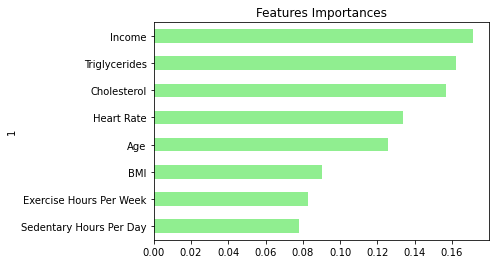

In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can visualise and sort the features by their importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)
print(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))

## Plot the difference between the actual and the predicted value.

C:\Users\Oormi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Oormi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


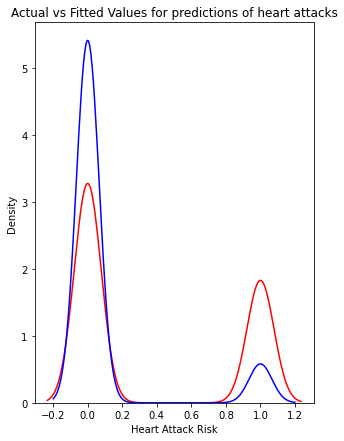

In [18]:
import seaborn as sns
plt.figure(figsize=(5, 7))

y_pred = prediction_threshold

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for predictions of heart attacks')

plt.show()
plt.close()

## Import and run Joblib

In [89]:
# using joblib with compression
from joblib import load, dump
pickle_file = 'rf_model.joblib'
with open(pickle_file, 'wb') as f:
    dump(rf_model, f, compress='zlib')
with open(pickle_file, 'rb') as f:
    rf_model = load(f)

In [19]:
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as f:
    pickle.dump(rf_model, f)
# in your prediction file                                                                                                                                                                                                           
with open('model_pkl', 'rb') as f:
    rf = pickle.load(f)

In [20]:
rf.predict_proba(X_test)

array([[0.55, 0.45],
       [0.67, 0.33],
       [0.63, 0.37],
       ...,
       [0.83, 0.17],
       [0.63, 0.37],
       [0.7 , 0.3 ]])

# Rejected models

## Deep learning model (rejected)

In [62]:
# Import dependencies and determine the number of unique values in each column
#import tensorflow as tf
#X.nunique()

In [61]:
"""
# Get the min and max for range
print(X['Age'].min(), X['Age'].max())
print(X['Cholesterol'].min(), X['Cholesterol'].max())
print(X['Heart Rate'].min(), X['Heart Rate'].max())
print(X['Exercise Hours Per Week'].min(), X['Exercise Hours Per Week'].max())
print(X['Sedentary Hours Per Day'].min(), X['Sedentary Hours Per Day'].max())
print(X['Income'].min(), X['Income'].max())
print(X['BMI'].min(), X['BMI'].max())
print(X['Triglycerides'].min(), X['Triglycerides'].max())
"""

"\n# Get the min and max for range\nprint(X['Age'].min(), X['Age'].max())\nprint(X['Cholesterol'].min(), X['Cholesterol'].max())\nprint(X['Heart Rate'].min(), X['Heart Rate'].max())\nprint(X['Exercise Hours Per Week'].min(), X['Exercise Hours Per Week'].max())\nprint(X['Sedentary Hours Per Day'].min(), X['Sedentary Hours Per Day'].max())\nprint(X['Income'].min(), X['Income'].max())\nprint(X['BMI'].min(), X['BMI'].max())\nprint(X['Triglycerides'].min(), X['Triglycerides'].max())\n"

In [59]:
"""
# Bin all columns except for exercise and sedentary hours per week

X['Age'] = pd.qcut(X['Age'], 10, 
                   labels=np.linspace(X['Age'].min(), X['Age'].max(), 
                                      num=10, dtype=np.int64))

X['Cholesterol'] = pd.qcut(X['Cholesterol'], 10, 
                           labels=np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), 
                                              num=10, dtype=np.int64))

X['Heart Rate'] = pd.qcut(X['Heart Rate'], 10, 
                           labels=np.linspace(X['Heart Rate'].min(), X['Heart Rate'].max(), 
                                              num=10, dtype=np.int64))

X['Income'] = pd.qcut(X['Income'], 10, 
                           labels=np.linspace(X['Income'].min(), X['Income'].max(), 
                                              num=10, dtype=np.int64))

X['BMI'] = pd.qcut(X['BMI'], 10, 
                           labels=np.linspace(X['BMI'].min(), X['BMI'].max(), 
                                              num=10, dtype=np.int64))

X['Triglycerides'] = pd.qcut(X['Triglycerides'], 10, 
                           labels=np.linspace(X['Triglycerides'].min(), X['Triglycerides'].max(), 
                                              num=10, dtype=np.int64))

X.head()
"""

"\n# Bin all columns except for exercise and sedentary hours per week\n\nX['Age'] = pd.qcut(X['Age'], 10, \n                   labels=np.linspace(X['Age'].min(), X['Age'].max(), \n                                      num=10, dtype=np.int64))\n\nX['Cholesterol'] = pd.qcut(X['Cholesterol'], 10, \n                           labels=np.linspace(X['Cholesterol'].min(), X['Cholesterol'].max(), \n                                              num=10, dtype=np.int64))\n\nX['Heart Rate'] = pd.qcut(X['Heart Rate'], 10, \n                           labels=np.linspace(X['Heart Rate'].min(), X['Heart Rate'].max(), \n                                              num=10, dtype=np.int64))\n\nX['Income'] = pd.qcut(X['Income'], 10, \n                           labels=np.linspace(X['Income'].min(), X['Income'].max(), \n                                              num=10, dtype=np.int64))\n\nX['BMI'] = pd.qcut(X['BMI'], 10, \n                           labels=np.linspace(X['BMI'].min(), X['BMI'].max(), \n

In [56]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3000)
#scaler = StandardScaler()
#X_scaler = scaler.fit(X_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#nn = tf.keras.models.Sequential()

# First hidden layer
#nn.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))

# Second hidden layer
#nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Output layer
#nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

#nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

#model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
## Auto-optimisation of model
#!pip install keras_tuner
"""
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=8))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model
"""

In [50]:
"""
# Import the kerastuner library
import keras_tuner as kt
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))
"""

'\n# Import the kerastuner library\nimport keras_tuner as kt\ntuner = kt.Hyperband(\n    create_model,\n    objective="val_accuracy",\n    max_epochs=200,\n    hyperband_iterations=2)\n\n# Run the kerastuner search for best hyperparameters\ntuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))\n'

In [51]:
# Get best model hyperparameters
#best_hyper = tuner.get_best_hyperparameters(1)[0]
#best_hyper.values

In [52]:
# Evaluate best model against full test data
#best_model = tuner.get_best_models(1)[0]
#model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

## Logistic Regression (rejected)

In [58]:
"""
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

logistic_regression_model = LogisticRegression(random_state=9)
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)
training_predictions = lr_model.predict(X_train_scaled)
testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Create confusion matrix
training_matrix = confusion_matrix(y_train, training_predictions)
print(training_matrix)
training_report = classification_report(y_train, training_predictions)
print(training_report)
"""

[[4203    0]
 [2369    0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      4203
           1       0.00      0.00      0.00      2369

    accuracy                           0.64      6572
   macro avg       0.32      0.50      0.39      6572
weighted avg       0.41      0.64      0.50      6572



C:\Users\Oormi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oormi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oormi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
